### Import and webdriver setup

In [1]:
!pip install wordcloud


In [2]:
#C:/Users/grema/Jupyter python stuff/PlayStoreScraper/chromedriver.exe
#C:/Users/jackie.yu/Documents/WeCloudData/Python/PlayStoreProject/PlayStoreScraper/chromedriver.exe

In [3]:
import re
import random
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

from collections import Counter
from time import sleep
from datetime import datetime

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jackie.yu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jackie.yu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome('C:/Users/jackie.yu/Documents/WeCloudData/Python/PlayStoreProject/PlayStoreScraper/chromedriver.exe')
#driver.get("https://play.google.com/store/apps/details?id=todolist.scheduleplanner.dailyplanner.todo.reminders&showAllReviews=true")

### Parsing through the html with Selenium

In [5]:
# Expands the "Read more" button for reviews and scrolls
def review_scroller(url, iterations):
    driver.get(url)
    for _ in range(iterations):   
        button_list = driver.find_elements_by_css_selector("button[jsname='gxjVle']")
        for button in button_list:
            driver.execute_script("arguments[0].click();", button)
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight-60);")
        sleep(2)
        try:
            driver.find_element_by_class_name("U26fgb.O0WRkf.oG5Srb.C0oVfc.n9lfJ.M9Bg4d").click()
        except:
            pass

In [6]:
def info_collector(url):
    review_scroller(url, 11)
    
    list_of_reviews = driver.find_elements_by_css_selector("span[jsname='bN97Pc']")
    review_dict = {}
    for i, review in enumerate(list_of_reviews):
        review_dict[i] = review.text

    list_of_reviews2 = driver.find_elements_by_css_selector("span[jsname='fbQN7e']")
    expanded_review_dict = {}
    for i, review in enumerate(list_of_reviews2):
        expanded_review_dict[i] = review.text

    for i in review_dict:
        if review_dict[i] == '':
            review_dict[i] = expanded_review_dict[i]
            
    category = driver.find_element_by_css_selector("a[itemprop = 'genre']").get_attribute("href")[44:]
    category_dict = {i:category for i in range(len(review_dict))}
    
    title = driver.find_element_by_tag_name("h1").text
    title_dict = {i:title for i in range(len(review_dict))}

    #filters out developer responses
    list_of_users = driver.find_elements_by_class_name("bAhLNe.kx8XBd")
    #finds date that review is posted and stores it as a datetime object
    list_of_dates = [user.find_elements_by_class_name('p2TkOb')[0].text for user in list_of_users]

    date_dict = {}

    for i, date in enumerate(list_of_dates):
        date_dict[i] = datetime.strptime(date, '%B %d, %Y')
        #date_dict[i].strftime('%Y-%m-%d') to convert back to string

    #finds how many likes a review has, no likes will be defaulted to 0
    list_of_likes = driver.find_elements_by_class_name('jUL89d.y92BAb')
    like_dict = {}

    for i, like in enumerate(list_of_likes):
        if like.text == '':
            like_dict[i] = 0
        else:
            like_dict[i] = int(like.text)

    # Parent class containing the star review
    star_parent_class = driver.find_elements_by_class_name("pf5lIe")
    # Child class containing the string star rating e.g. "Rated 5 stars out of five stars"
    list_of_stars = [parent.find_element_by_css_selector("div").get_attribute("aria-label") for parent in star_parent_class]
    star_dict = {}

    for i, star in enumerate(list_of_stars):
        # Retrieving reviews that do not have a float value 
        # as these come from the recommended apps on the bottom
        if not re.search('(\d\.\d)', star):        
            star_dict[i-1] = int(re.search('[0-5]', star).group())

            
    
    return_list = [title_dict, category_dict, date_dict, star_dict, review_dict, like_dict]
    return return_list

### Forest data

In [7]:
forest_list = info_collector('https://play.google.com/store/apps/details?id=cc.forestapp&hl=en_CA&gl=US&showAllReviews=true')
forest_list

[{0: 'Forest: Stay focused',
  1: 'Forest: Stay focused',
  2: 'Forest: Stay focused',
  3: 'Forest: Stay focused',
  4: 'Forest: Stay focused',
  5: 'Forest: Stay focused',
  6: 'Forest: Stay focused',
  7: 'Forest: Stay focused',
  8: 'Forest: Stay focused',
  9: 'Forest: Stay focused',
  10: 'Forest: Stay focused',
  11: 'Forest: Stay focused',
  12: 'Forest: Stay focused',
  13: 'Forest: Stay focused',
  14: 'Forest: Stay focused',
  15: 'Forest: Stay focused',
  16: 'Forest: Stay focused',
  17: 'Forest: Stay focused',
  18: 'Forest: Stay focused',
  19: 'Forest: Stay focused',
  20: 'Forest: Stay focused',
  21: 'Forest: Stay focused',
  22: 'Forest: Stay focused',
  23: 'Forest: Stay focused',
  24: 'Forest: Stay focused',
  25: 'Forest: Stay focused',
  26: 'Forest: Stay focused',
  27: 'Forest: Stay focused',
  28: 'Forest: Stay focused',
  29: 'Forest: Stay focused',
  30: 'Forest: Stay focused',
  31: 'Forest: Stay focused',
  32: 'Forest: Stay focused',
  33: 'Forest: Stay 

### Google calendar

In [8]:
google_calendar_list = info_collector('https://play.google.com/store/apps/details?id=com.google.android.calendar&showAllReviews=true')

### Genshin Impact

In [9]:
genshin_list = info_collector('https://play.google.com/store/apps/details?id=com.miHoYo.GenshinImpact&hl=en_CA&gl=US&showAllReviews=true')
genshin_list

[{0: 'Genshin Impact',
  1: 'Genshin Impact',
  2: 'Genshin Impact',
  3: 'Genshin Impact',
  4: 'Genshin Impact',
  5: 'Genshin Impact',
  6: 'Genshin Impact',
  7: 'Genshin Impact',
  8: 'Genshin Impact',
  9: 'Genshin Impact',
  10: 'Genshin Impact',
  11: 'Genshin Impact',
  12: 'Genshin Impact',
  13: 'Genshin Impact',
  14: 'Genshin Impact',
  15: 'Genshin Impact',
  16: 'Genshin Impact',
  17: 'Genshin Impact',
  18: 'Genshin Impact',
  19: 'Genshin Impact',
  20: 'Genshin Impact',
  21: 'Genshin Impact',
  22: 'Genshin Impact',
  23: 'Genshin Impact',
  24: 'Genshin Impact',
  25: 'Genshin Impact',
  26: 'Genshin Impact',
  27: 'Genshin Impact',
  28: 'Genshin Impact',
  29: 'Genshin Impact',
  30: 'Genshin Impact',
  31: 'Genshin Impact',
  32: 'Genshin Impact',
  33: 'Genshin Impact',
  34: 'Genshin Impact',
  35: 'Genshin Impact',
  36: 'Genshin Impact',
  37: 'Genshin Impact',
  38: 'Genshin Impact',
  39: 'Genshin Impact',
  40: 'Genshin Impact',
  41: 'Genshin Impact',
  

### Pokemon GO

In [10]:
pokemon_list = info_collector('https://play.google.com/store/apps/details?id=com.nianticlabs.pokemongo&showAllReviews=true')
pokemon_list

[{0: 'Pokémon GO',
  1: 'Pokémon GO',
  2: 'Pokémon GO',
  3: 'Pokémon GO',
  4: 'Pokémon GO',
  5: 'Pokémon GO',
  6: 'Pokémon GO',
  7: 'Pokémon GO',
  8: 'Pokémon GO',
  9: 'Pokémon GO',
  10: 'Pokémon GO',
  11: 'Pokémon GO',
  12: 'Pokémon GO',
  13: 'Pokémon GO',
  14: 'Pokémon GO',
  15: 'Pokémon GO',
  16: 'Pokémon GO',
  17: 'Pokémon GO',
  18: 'Pokémon GO',
  19: 'Pokémon GO',
  20: 'Pokémon GO',
  21: 'Pokémon GO',
  22: 'Pokémon GO',
  23: 'Pokémon GO',
  24: 'Pokémon GO',
  25: 'Pokémon GO',
  26: 'Pokémon GO',
  27: 'Pokémon GO',
  28: 'Pokémon GO',
  29: 'Pokémon GO',
  30: 'Pokémon GO',
  31: 'Pokémon GO',
  32: 'Pokémon GO',
  33: 'Pokémon GO',
  34: 'Pokémon GO',
  35: 'Pokémon GO',
  36: 'Pokémon GO',
  37: 'Pokémon GO',
  38: 'Pokémon GO',
  39: 'Pokémon GO',
  40: 'Pokémon GO',
  41: 'Pokémon GO',
  42: 'Pokémon GO',
  43: 'Pokémon GO',
  44: 'Pokémon GO',
  45: 'Pokémon GO',
  46: 'Pokémon GO',
  47: 'Pokémon GO',
  48: 'Pokémon GO',
  49: 'Pokémon GO',
  50: 'Pok

### Instagram

In [11]:
insta_list = info_collector('https://play.google.com/store/apps/details?id=com.instagram.android&hl=en_CA&gl=US&showAllReviews=true')
insta_list

[{0: 'Instagram',
  1: 'Instagram',
  2: 'Instagram',
  3: 'Instagram',
  4: 'Instagram',
  5: 'Instagram',
  6: 'Instagram',
  7: 'Instagram',
  8: 'Instagram',
  9: 'Instagram',
  10: 'Instagram',
  11: 'Instagram',
  12: 'Instagram',
  13: 'Instagram',
  14: 'Instagram',
  15: 'Instagram',
  16: 'Instagram',
  17: 'Instagram',
  18: 'Instagram',
  19: 'Instagram',
  20: 'Instagram',
  21: 'Instagram',
  22: 'Instagram',
  23: 'Instagram',
  24: 'Instagram',
  25: 'Instagram',
  26: 'Instagram',
  27: 'Instagram',
  28: 'Instagram',
  29: 'Instagram',
  30: 'Instagram',
  31: 'Instagram',
  32: 'Instagram',
  33: 'Instagram',
  34: 'Instagram',
  35: 'Instagram',
  36: 'Instagram',
  37: 'Instagram',
  38: 'Instagram',
  39: 'Instagram',
  40: 'Instagram',
  41: 'Instagram',
  42: 'Instagram',
  43: 'Instagram',
  44: 'Instagram',
  45: 'Instagram',
  46: 'Instagram',
  47: 'Instagram',
  48: 'Instagram',
  49: 'Instagram',
  50: 'Instagram',
  51: 'Instagram',
  52: 'Instagram',
  5

### Tiktok

In [12]:
tiktok_list = info_collector('https://play.google.com/store/apps/details?id=com.zhiliaoapp.musically&showAllReviews=true')
tiktok_list

[{0: 'TikTok',
  1: 'TikTok',
  2: 'TikTok',
  3: 'TikTok',
  4: 'TikTok',
  5: 'TikTok',
  6: 'TikTok',
  7: 'TikTok',
  8: 'TikTok',
  9: 'TikTok',
  10: 'TikTok',
  11: 'TikTok',
  12: 'TikTok',
  13: 'TikTok',
  14: 'TikTok',
  15: 'TikTok',
  16: 'TikTok',
  17: 'TikTok',
  18: 'TikTok',
  19: 'TikTok',
  20: 'TikTok',
  21: 'TikTok',
  22: 'TikTok',
  23: 'TikTok',
  24: 'TikTok',
  25: 'TikTok',
  26: 'TikTok',
  27: 'TikTok',
  28: 'TikTok',
  29: 'TikTok',
  30: 'TikTok',
  31: 'TikTok',
  32: 'TikTok',
  33: 'TikTok',
  34: 'TikTok',
  35: 'TikTok',
  36: 'TikTok',
  37: 'TikTok',
  38: 'TikTok',
  39: 'TikTok',
  40: 'TikTok',
  41: 'TikTok',
  42: 'TikTok',
  43: 'TikTok',
  44: 'TikTok',
  45: 'TikTok',
  46: 'TikTok',
  47: 'TikTok',
  48: 'TikTok',
  49: 'TikTok',
  50: 'TikTok',
  51: 'TikTok',
  52: 'TikTok',
  53: 'TikTok',
  54: 'TikTok',
  55: 'TikTok',
  56: 'TikTok',
  57: 'TikTok',
  58: 'TikTok',
  59: 'TikTok',
  60: 'TikTok',
  61: 'TikTok',
  62: 'TikTok',
  

### Panda panda panda

In [13]:
# title_dict, category_dict, date_dict, star_dict, review_dict, like_dict
forest_df = pd.DataFrame(forest_list, index=['Title', 'Category', 'Date', 'Stars', 'Review', 'Likes']).transpose()
google_calendar_df = pd.DataFrame(google_calendar_list, index=['Title', 'Category', 'Date', 'Stars', 'Review', 'Likes']).transpose()
genshin_df = pd.DataFrame(genshin_list, index=['Title', 'Category', 'Date', 'Stars', 'Review', 'Likes']).transpose()
pokemon_df = pd.DataFrame(pokemon_list, index=['Title', 'Category', 'Date', 'Stars', 'Review', 'Likes']).transpose()
insta_df = pd.DataFrame(insta_list, index=['Title', 'Category', 'Date', 'Stars', 'Review', 'Likes']).transpose()
tiktok_df = pd.DataFrame(tiktok_list, index=['Title', 'Category', 'Date', 'Stars', 'Review', 'Likes']).transpose()

In [14]:
data_df = pd.concat([forest_df, google_calendar_df, genshin_df, pokemon_df, insta_df, tiktok_df])
data_df = data_df.reset_index(drop= True)

In [15]:
data_df['Stars'] = data_df['Stars'].astype(np.int64)
data_df['Likes'] = data_df['Likes'].astype(np.int64)

In [16]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Title     3600 non-null   object        
 1   Category  3600 non-null   object        
 2   Date      3600 non-null   datetime64[ns]
 3   Stars     3600 non-null   int64         
 4   Review    3600 non-null   object        
 5   Likes     3600 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 168.9+ KB


### Average number of stars per category

In [17]:
data_df.groupby('Category')['Stars'].mean()

Category
GAME_ADVENTURE    3.082500
PRODUCTIVITY      3.320833
SOCIAL            2.581667
Name: Stars, dtype: float64

### Average number of stars per star rating per category

In [20]:
data2 = data_df.groupby(['Category', 'Stars'])['Stars'].count()

In [21]:
data2.groupby('Stars').mean()

Stars
1    350.333333
2    154.333333
3    182.000000
4    177.666667
5    335.666667
Name: Stars, dtype: float64

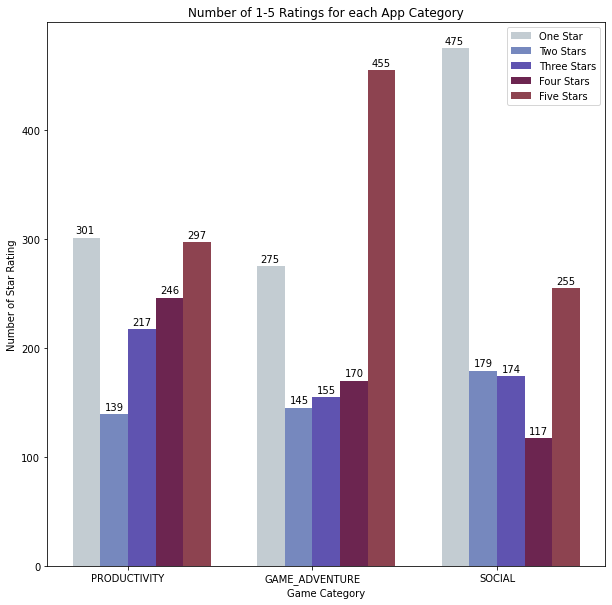

In [200]:
labels = data_df['Category'].unique()
one_star = data2.values[0::5]
two_star = data2.values[1::5]
three_star = data2.values[2::5]
four_star = data2.values[3::5]
five_star = data2.values[4::5]

w = 0.15;
plt.figure(figsize=(10, 10));

r1 = np.arange(len(labels))
r2 = [i + w for i in r1]
r3 = [i + w for i in r2]
r4 = [i + w for i in r3]
r5 = [i + w for i in r4]

plt.bar(r1, one_star, width = w, label = 'One Star', color = '#c3ccd2');
plt.bar(r2, two_star, width = w, label = 'Two Stars', color = '#7688be');
plt.bar(r3, three_star, width = w, label = 'Three Stars', color = '#5f53b0');
plt.bar(r4, four_star, width = w, label = 'Four Stars', color = '#6c2550');
plt.bar(r5, five_star, width = w, label = 'Five Stars', color = '#8d4350');

plt.xticks(r1 + w + w/2, labels);
plt.xlabel('Game Category')
plt.ylabel('Number of Star Rating');
plt.title('Number of 1-5 Ratings for each App Category');


for index, value in enumerate(one_star):
    plt.text(index - 0.06,value+4, str(value))
    
for index, value in enumerate(two_star):
    plt.text(index + 0.1,value+4, str(value))

for index, value in enumerate(three_star):
    plt.text(index + 0.25,value+4, str(value))
    
for index, value in enumerate(four_star):
    plt.text(index + 0.4,value+4, str(value))
    
for index, value in enumerate(five_star):
    plt.text(index + 0.545,value+4, str(value))

plt.legend();

plt.savefig('StarPerStarPerCat.png')

### Words most common in a star review

In [143]:
text = "Nick likes to play football, however he is not too fond of tennis."
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw)


['Nick', 'likes', 'play', 'football', ',', 'however', 'fond', 'tennis', '.']


In [144]:
tokenized_words = {}

new_stopwords = stopwords.words() + ['I', ',', "n't", '!', "'", 'For',\
                                     ".", "It'", 'It', '-', "'ll", "'m",\
                                     "'s", '/', "My", 'The', "'ve", 'So',\
                                     'A', 'This', ')', '(', '?', ':', ';',\
                                     'But', 'though', "'re"]    

for i, review in enumerate(data_df["Review"]):
    text_tokens = word_tokenize(review)
    tokens_without_sw = [word for word in text_tokens if not word in new_stopwords]
    tokenized_words[i] = ' '.join(tokens_without_sw)
    


In [145]:
tokenized_words

{0: 'GREAT app Really love Edit said great give alarm limited time focus frustrating easily get app & use apps Trees Deep focus mode need premium subscription 🙄 When keep phone outside view & set time reach goal within time give alarm time become look back',
 1: 'really great app using since long recent update ruined experience Now access phone settings alarm clock even system launcher planting tree even make phone call without withering tree obviously whitelist well free account request developers please put things whitelist default bring back previous version ....',
 2: 'put words much app provides needs actions By upgrading plus able plant real trees comfort home indeed worth affordable sustainable well creators great job using app 3 years failed since Suggestion create extension works like momentum timer chrome go away click Thanks',
 3: 'would given 5 stars since app helpful concentrating Only since last update seems bug see statistics anymore none forests whole week month see act

In [146]:
token = pd.DataFrame([tokenized_words], index=['TokenReview']).transpose()

data_df = pd.concat([data_df, token], axis=1)


In [147]:
data_df

Title      Category       Date  Stars  \
0     Forest: Stay focused  PRODUCTIVITY 2021-10-19      1   
1     Forest: Stay focused  PRODUCTIVITY 2021-10-19      1   
2     Forest: Stay focused  PRODUCTIVITY 2021-10-16      5   
3     Forest: Stay focused  PRODUCTIVITY 2021-09-27      4   
4     Forest: Stay focused  PRODUCTIVITY 2021-09-29      4   
...                    ...           ...        ...    ...   
3595                TikTok        SOCIAL 2021-10-09      5   
3596                TikTok        SOCIAL 2021-10-07      1   
3597                TikTok        SOCIAL 2021-09-27      5   
3598                TikTok        SOCIAL 2021-10-10      5   
3599                TikTok        SOCIAL 2021-10-15      1   

                                                 Review  Likes  \
0     GREAT app. Really love this Edit: I said it gr...      6   
1     It's really a great app and I've been using it...      1   
2     I can't put into words how much this app provi...     72   
3     I would have given 5 stars, since this app is ...    211   
4     Amazing App only had it for a few days and it'...     93   
...                                                 ...    ...   
3595  Amazing app my only concern is when I am watch...      2   
3596  I really do not like the things that people ca...     12   
3597  Love this app. So many video editing skills I ...     54   
3598  Pretty cool! I like the features and the conte...      2   
3599  It us it is Impossible to add a downloaded vid...      1   

                                            TokenReview  
0     GREAT app Really love Edit said great give ala...  
1     really great app using since long recent updat...  
2     put words much app provides needs actions By u...  
3     would given 5 stars since app helpful concentr...  
4     Amazing App days already helping productivity ...  
...                                                 ...  
3595  Amazing app concern watching live longer see l...  
3596  really like things people put TikTok really ha...  
3597  Love app many video editing skills learned app...  
3598  Pretty cool like features content creators The...  
3599  us Impossible add downloaded video film video ...  

[3600 rows x 7 columns]

In [148]:
data_df.groupby('Stars')['TokenReview'].apply(lambda x: Counter(" ".join(x).split()).most_common(100))[5]

[('app', 705),
 ('game', 530),
 ('love', 263),
 ('like', 259),
 ('really', 243),
 ('get', 195),
 ('time', 186),
 ('good', 182),
 ('great', 172),
 ('fun', 147),
 ('people', 134),
 ('focus', 128),
 ('amazing', 125),
 ('much', 118),
 ('...', 115),
 ('work', 109),
 ('one', 109),
 ('would', 105),
 ('best', 105),
 ('use', 102),
 ('make', 102),
 ('play', 100),
 ('phone', 97),
 ('even', 89),
 ('see', 80),
 ('videos', 80),
 ('helps', 77),
 ('using', 76),
 ('lot', 75),
 ('many', 75),
 ('way', 73),
 ('keep', 73),
 ('think', 73),
 ('new', 73),
 ('recommend', 71),
 ('still', 71),
 ('characters', 71),
 ('trees', 70),
 ('things', 68),
 ('playing', 68),
 ('5', 66),
 ('Love', 63),
 ('go', 61),
 ('focused', 59),
 ('story', 59),
 ('give', 58),
 ('day', 57),
 ('help', 57),
 ('friends', 57),
 ('free', 57),
 ('could', 56),
 ('..', 56),
 ('need', 56),
 ('nice', 56),
 ('studying', 55),
 ('study', 53),
 ('know', 53),
 ('well', 52),
 ('better', 52),
 ('thing', 52),
 ('world', 51),
 ('pokemon', 51),
 ('back', 50

In [149]:
data_df.groupby(['Stars','Category'])['TokenReview'].apply(lambda x: Counter(" ".join(x).split()).most_common(100))

Stars  Category      
1      GAME_ADVENTURE    [(game, 352), (play, 97), (get, 88), (even, 85...
       PRODUCTIVITY      [(calendar, 133), (app, 119), (update, 108), (...
       SOCIAL            [(app, 414), (account, 176), (Instagram, 158),...
2      GAME_ADVENTURE    [(game, 185), (get, 44), (play, 41), (even, 35...
       PRODUCTIVITY      [(app, 78), (calendar, 69), (widget, 40), (new...
       SOCIAL            [(app, 168), (like, 57), (account, 56), (Insta...
3      GAME_ADVENTURE    [(game, 278), (get, 70), (like, 68), (really, ...
       PRODUCTIVITY      [(app, 76), (calendar, 49), (Google, 40), (......
       SOCIAL            [(app, 146), (account, 47), (like, 46), (video...
4      GAME_ADVENTURE    [(game, 357), (get, 94), (like, 88), (really, ...
       PRODUCTIVITY      [(app, 161), (time, 45), (good, 40), (calendar...
       SOCIAL            [(app, 107), (like, 38), (good, 38), (videos, ...
5      GAME_ADVENTURE    [(game, 522), (love, 101), (fun, 94), (get, 93...
   

In [150]:
stopwords2 = set(STOPWORDS)
stopwords2.update(['game', 'app', 'Instagram', 'Forest', 'Pokemon', 'Go', 'Genshin', 'Impact', 'TikTok', 'calendar'])

In [212]:
def word_cloud_maker(title, star_num):
    plt.figure(figsize=(15, 15))
    title_df = data_df[data_df['Title']==title]
    text = ' '.join(review for review in title_df[title_df['Stars'] == star_num]['TokenReview'])
    wordcloud = WordCloud(stopwords=stopwords2, max_font_size=60, background_color='white', colormap='twilight').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{title}: {star_num} star review wordcloud")
    plt.savefig(f"{title}{star_num}StarReviewWordCloud.png")
    #plt.show()

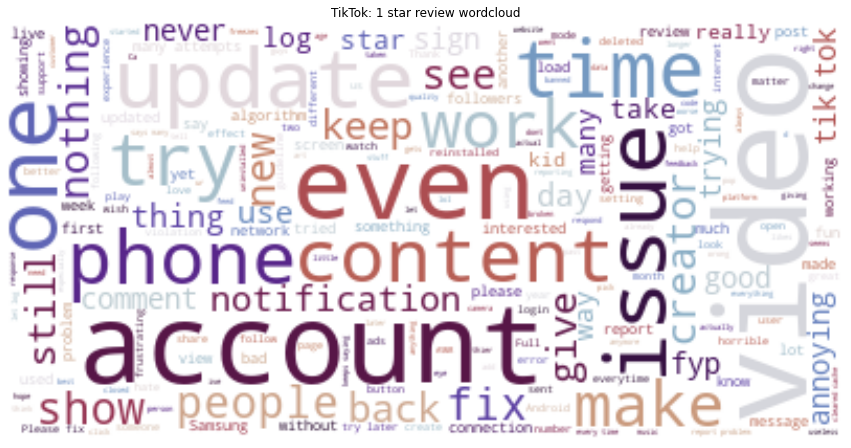

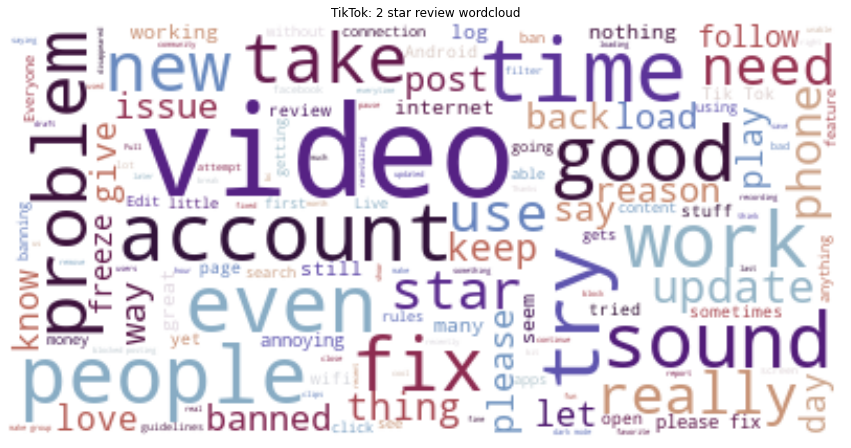

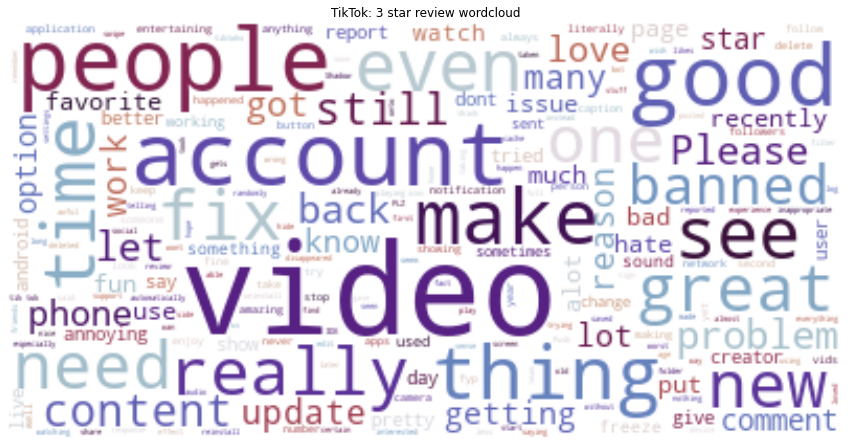

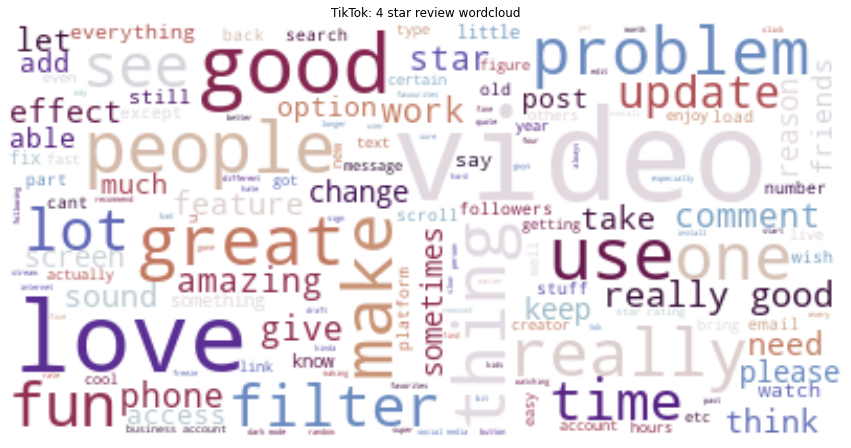

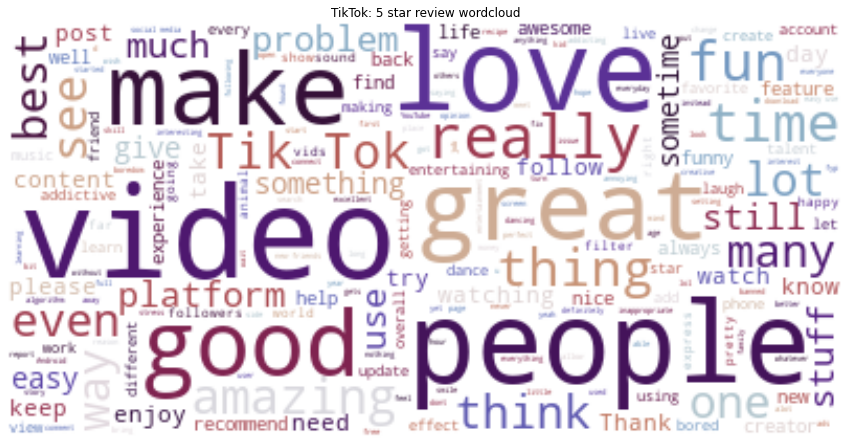

In [213]:
for i in [1,2,3,4,5]:
    word_cloud_maker('TikTok', i)

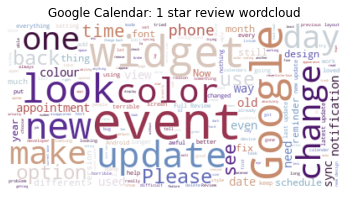

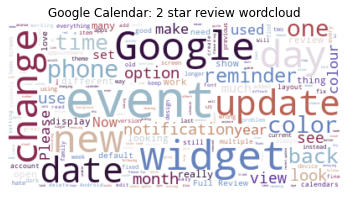

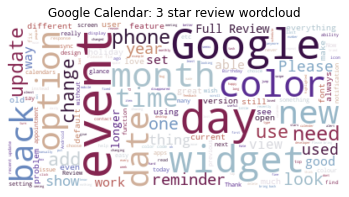

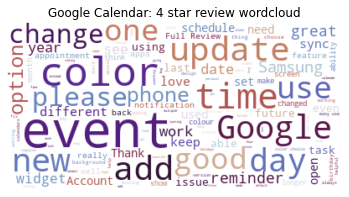

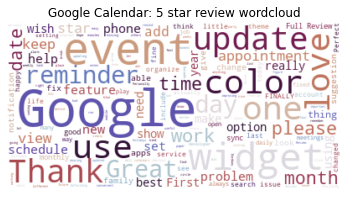

In [153]:
for i in [1,2,3,4,5]:
    word_cloud_maker('Google Calendar', i)

### Stars over a period

In [154]:
data_df['Title'].unique()

array(['Forest: Stay focused', 'Google Calendar', 'Genshin Impact',
       'Pokémon GO', 'Instagram', 'TikTok'], dtype=object)

In [227]:
def stars_over_date(title):
    title_df = data_df[data_df['Title'] == title]
    title_df = title_df[['Title','Date' ,'Stars']]
    title_df = title_df.sort_values('Date')
    plt.figure(figsize=(17,5))
    plt.plot(title_df['Date'].unique(), title_df.groupby('Date')['Stars'].mean(), linewidth = 5,color = '#5f53b0')
    plt.title(f'{title}: Star Rating Over Date Range')
    plt.ylim([0, 5])
    plt.xlabel('Date')
    plt.ylabel('Star Rating')
    plt.savefig(f"{title}StarsOverPeriod.png")

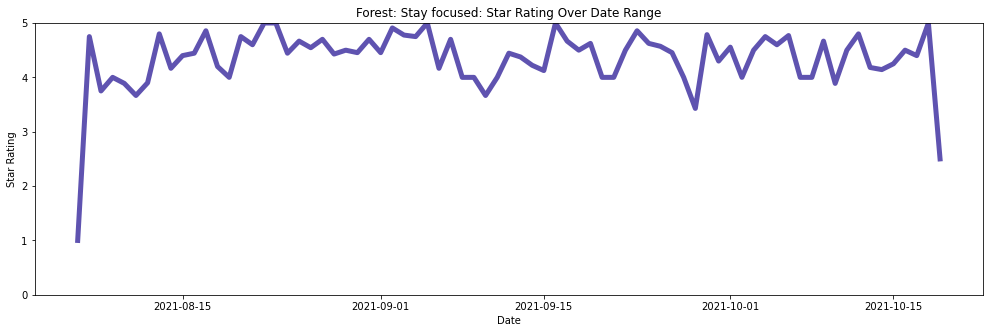

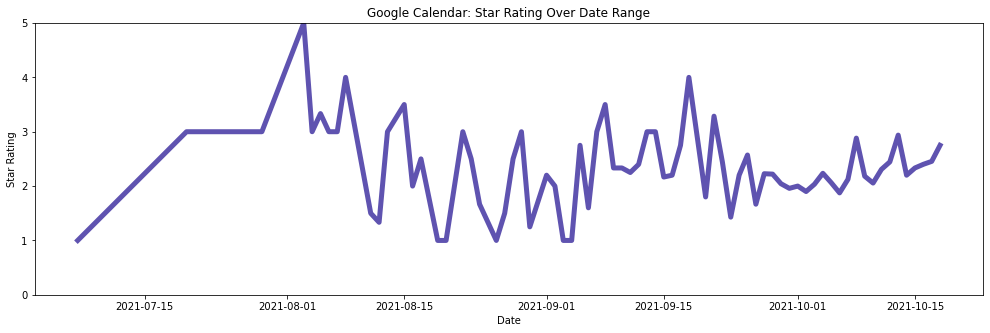

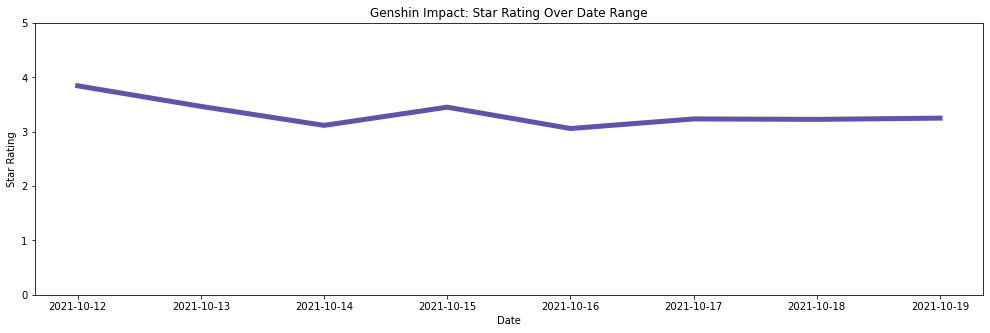

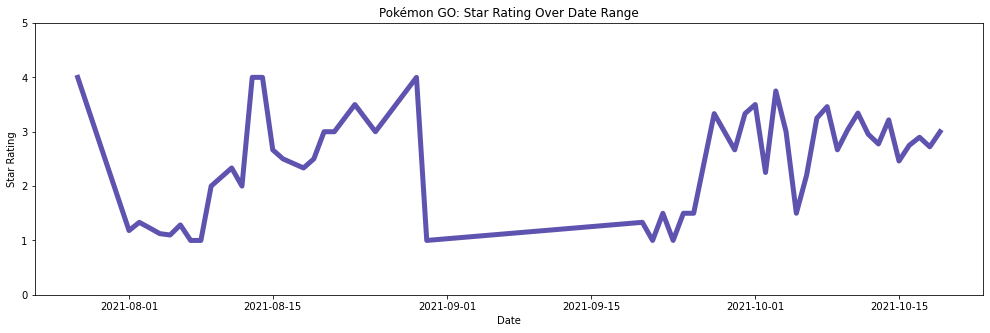

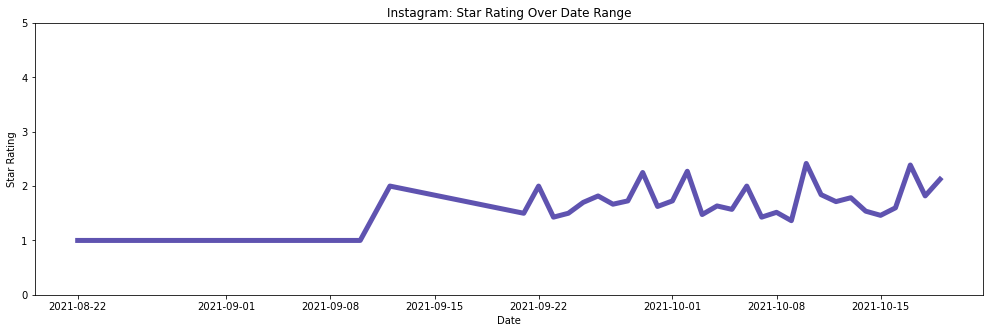

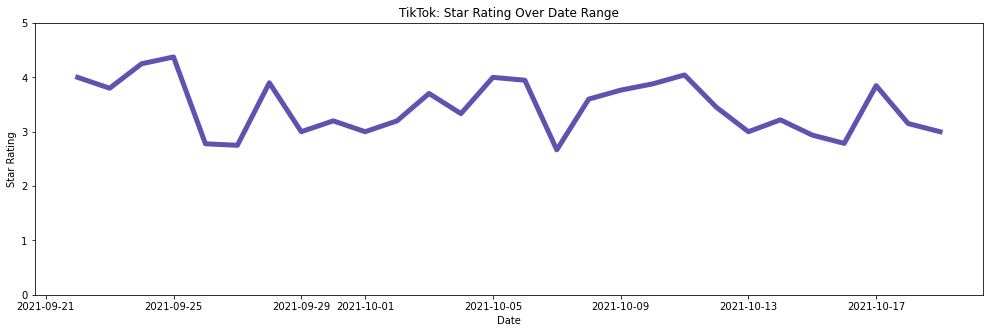

In [228]:
for title in data_df['Title'].unique():
    stars_over_date(title)

### Likes stars average

In [157]:
like_star_avg = data_df.groupby('Stars')['Likes'].mean()

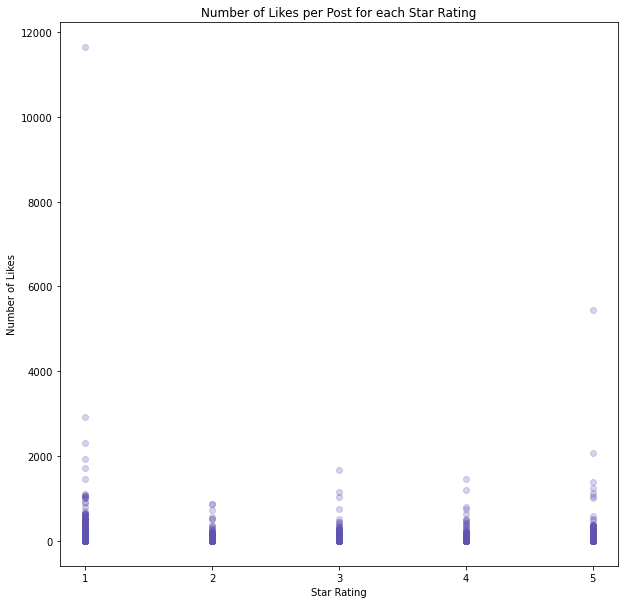

In [230]:
plt.figure(figsize=(10, 10))
plt.plot(data_df['Stars'], data_df['Likes'], 'o', color = '#5f53b0', alpha = 0.25)
plt.xlabel('Star Rating')
plt.ylabel('Number of Likes')
plt.title('Number of Likes per Post for each Star Rating')
plt.xticks(np.arange(min(data_df['Stars']), max(data_df['Stars'])+1, 1.0));
plt.savefig("LikeStarsCount.png");

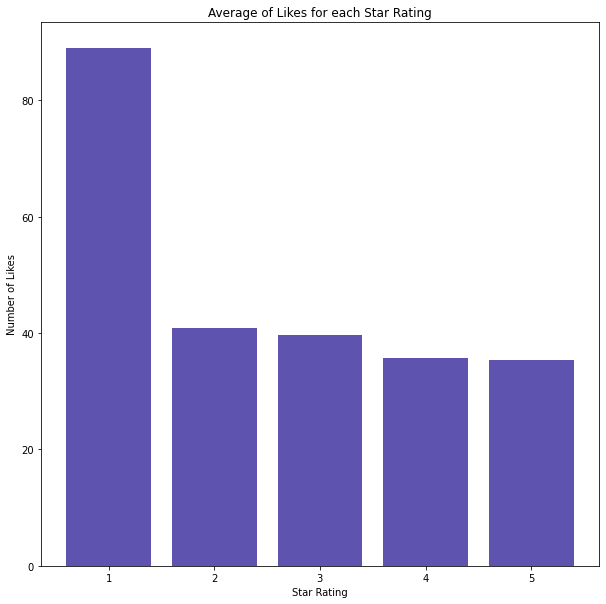

In [231]:
plt.figure(figsize=(10, 10))
plt.xlabel('Star Rating')
plt.ylabel('Number of Likes')
plt.title('Average of Likes for each Star Rating')
plt.bar([1,2,3,4,5], like_star_avg, color = '#5f53b0');
plt.savefig("LikeStarsAvg.png");

In [160]:
data_df[['Stars', 'Likes', 'Title']].sort_values('Likes')

Stars  Likes           Title
1799      5      0  Genshin Impact
2027      2      0      Pokémon GO
2020      3      0      Pokémon GO
2019      1      0      Pokémon GO
2017      3      0      Pokémon GO
...     ...    ...             ...
2853      5   2074       Instagram
3217      1   2315          TikTok
3168      1   2917          TikTok
3027      5   5436          TikTok
3282      1  11645          TikTok

[3600 rows x 3 columns]

In [161]:
review_len = {i: len(review) for i, review in enumerate(data_df['Review'])}

In [162]:
length = pd.DataFrame([review_len], index=['ReviewLen']).transpose()

data_df = pd.concat([data_df, length], axis=1)

In [163]:
data_df

Title      Category       Date  Stars  \
0     Forest: Stay focused  PRODUCTIVITY 2021-10-19      1   
1     Forest: Stay focused  PRODUCTIVITY 2021-10-19      1   
2     Forest: Stay focused  PRODUCTIVITY 2021-10-16      5   
3     Forest: Stay focused  PRODUCTIVITY 2021-09-27      4   
4     Forest: Stay focused  PRODUCTIVITY 2021-09-29      4   
...                    ...           ...        ...    ...   
3595                TikTok        SOCIAL 2021-10-09      5   
3596                TikTok        SOCIAL 2021-10-07      1   
3597                TikTok        SOCIAL 2021-09-27      5   
3598                TikTok        SOCIAL 2021-10-10      5   
3599                TikTok        SOCIAL 2021-10-15      1   

                                                 Review  Likes  \
0     GREAT app. Really love this Edit: I said it gr...      6   
1     It's really a great app and I've been using it...      1   
2     I can't put into words how much this app provi...     72   
3     I would have given 5 stars, since this app is ...    211   
4     Amazing App only had it for a few days and it'...     93   
...                                                 ...    ...   
3595  Amazing app my only concern is when I am watch...      2   
3596  I really do not like the things that people ca...     12   
3597  Love this app. So many video editing skills I ...     54   
3598  Pretty cool! I like the features and the conte...      2   
3599  It us it is Impossible to add a downloaded vid...      1   

                                            TokenReview  ReviewLen  
0     GREAT app Really love Edit said great give ala...        408  
1     really great app using since long recent updat...        473  
2     put words much app provides needs actions By u...        447  
3     would given 5 stars since app helpful concentr...        358  
4     Amazing App days already helping productivity ...        499  
...                                                 ...        ...  
3595  Amazing app concern watching live longer see l...        166  
3596  really like things people put TikTok really ha...        315  
3597  Love app many video editing skills learned app...        142  
3598  Pretty cool like features content creators The...        125  
3599  us Impossible add downloaded video film video ...        209  

[3600 rows x 8 columns]

### Length of review relative to stars

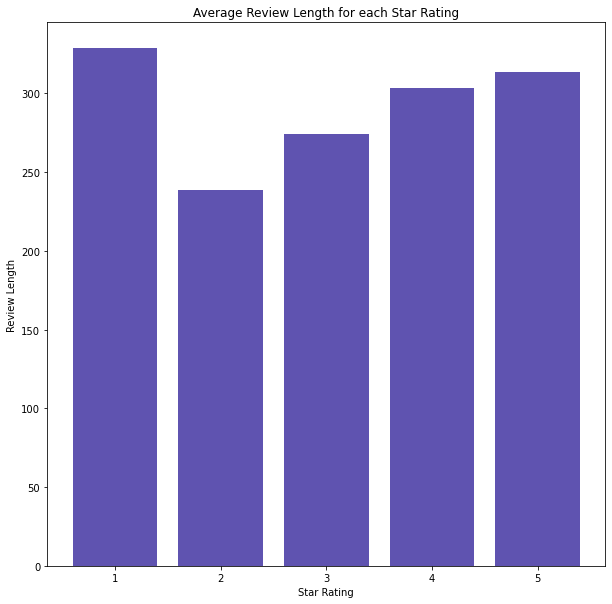

In [232]:
plt.figure(figsize=(10, 10))
plt.bar(data_df['Stars'].unique(), data_df.groupby(['Stars'])['ReviewLen'].mean(), color = '#5f53b0');
plt.xlabel('Star Rating');
plt.ylabel('Review Length');
plt.title('Average Review Length for each Star Rating');
plt.savefig("ReviewLengthStar.png");